## The 10-armed Testbed

Stationary Bandits are those whose reward probabilities wont change over time. 
Each play's reward is averaged over the 2000 tasks so that the law of large numbers takes effect, and the reward converges to the real value. Each Play/run has 1000 steps and reward is taken from a normal distribution from a 

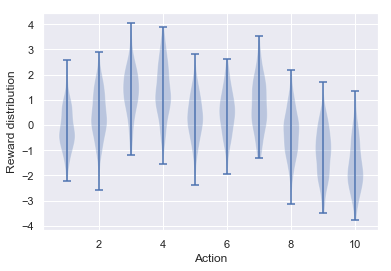

In [125]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.violinplot(dataset=np.random.randn(100,10) + np.random.normal(0,1,10))
plt.xlabel("Action")
plt.ylabel("Reward distribution"); 

In [127]:
import numpy as np
import random
mu,sigma = 0,1
num_arms = 10
initialVal = 0 
step_size = 0.1
def stationary_bandit(epsilon,sample_averages=False):
    average_reward = np.zeros(1000,dtype=float)
    average_optimal = np.zeros(1000,dtype=int)
    for run in range(2000):
        #q*(a)
        actions_qa = np.random.normal(mu,sigma,num_arms)
        optimal_action = np.argmax(actions_qa)
        #Table to store Action Values (Q)
        Q = np.zeros(num_arms,dtype=float)
        a_counts = np.zeros(num_arms,dtype = int)
        run_reward = np.zeros(1000,dtype=float)
        run_optimal = np.zeros(1000,dtype=bool)
#         print("Optimal Action is ",optimal_action)
        for step in range(1000): 
            choice = np.random.rand()
            if choice < epsilon :
                #explore
                a = np.random.randint(num_arms)
            else:
                #exploit (select the best Action value)
                a=np.random.choice(np.flatnonzero(Q == Q.max()))
            a_counts[a] += 1
            reward = np.random.randn() + actions_qa[a]
            #update Q value of the action selected
            if sample_averages :
                Q[a] += float(reward-Q[a])/a_counts[a]
            else:
                Q[a] += step_size*float(reward-Q[a])
            run_reward[step] = reward
            run_optimal[step] = (a==optimal_action)
        average_reward += run_reward
        average_optimal+= run_optimal
    return average_reward,average_optimal
 

In [128]:
av_reward_greedy,av_optimal_greedy = stationary_bandit(0)
av_reward_eps_001,av_optimal_eps_001 = stationary_bandit(0.01)
av_reward_eps_01,av_optimal_eps_01 = stationary_bandit(0.1)
av_reward_eps_04,av_optimal_eps_04 = stationary_bandit(0.4)
av_reward_eps_001_stepwise,av_optimal_eps_001_stepwise = stationary_bandit(0.1,sample_averages=True)

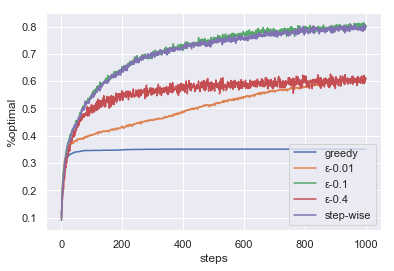

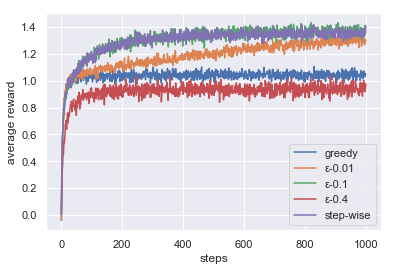

In [129]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.plot(np.linspace(1,1000,1000),av_optimal_greedy/2000, label="greedy")
plt.plot(np.linspace(1,1000,1000),av_optimal_eps_001/2000 , label ="ε-0.01")
plt.plot(np.linspace(1,1000,1000),av_optimal_eps_01/2000, label ="ε-0.1")
plt.plot(np.linspace(1,1000,1000),av_optimal_eps_04/2000, label ="ε-0.4")
plt.plot(np.linspace(1,1000,1000),av_optimal_eps_001_stepwise/2000, label ="step-wise")
plt.legend()
plt.ylabel('%optimal')
plt.xlabel('steps')
plt.show()
plt.plot(np.linspace(1,1000,1000),av_reward_greedy/2000, label="greedy")
plt.plot(np.linspace(1,1000,1000),av_reward_eps_001/2000, label ="ε-0.01")
plt.plot(np.linspace(1,1000,1000),av_reward_eps_01/2000, label ="ε-0.1")
plt.plot(np.linspace(1,1000,1000),av_reward_eps_04/2000, label ="ε-0.4")
plt.plot(np.linspace(1,1000,1000),av_reward_eps_001_stepwise/2000, label ="step-wise")
plt.legend()
plt.ylabel('average reward')
plt.xlabel('steps')
plt.show()

*One of the critical observations in the %optimal graph is that at zero steps the optimal action selected obtained is 0.1 as on many runs there is 10% chance that one of the 10 actions is selected.* 

## Non Stationary Reward

Exercise 2.5 (programming) Design and conduct an experiment to demonstrate the difficulties that
sample-average methods have for nonstationary problems. Use a modified version of the 10-armed
testbed in which all the q(a) start out equal and then take independent random walks (say by adding
a normally distributed increment with mean zero and standard deviation 0.01 to all the q*(a) on each
step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally
computed, and another action-value method using a constant step-size parameter, alpha = 0.1. Use "ε  = 0.1
and longer runs, say of 10,000 steps.

In [147]:
import numpy as np
import random
num_arms = 10
step_size = 0.1
def NonStationary_bandit(epsilon,sample_averages=False):
    average_reward = np.zeros(10000,dtype=float)
    average_optimal = np.zeros(10000,dtype=int)
    for run in range(2000):
        if run%500==0:
            print(run/500)
        #q*(a) all of them be intially 1
        actions_qa = np.ones(num_arms)
        optimal_action = np.random.randint(num_arms)
        #Table to store Action Values (Q)
        Q = np.zeros(num_arms,dtype=float)
        a_counts = np.zeros(num_arms,dtype = int)
        run_reward = np.zeros(10000,dtype=float)
        run_optimal = np.zeros(10000,dtype=bool)
#         print("Optimal Action is ",optimal_action)
        for step in range(10000): 
            choice = np.random.rand()
            if choice < epsilon :
                #explore
                a = np.random.randint(num_arms)
            else:
                #exploit (select the best Action value)
                a=np.random.choice(np.flatnonzero(Q == Q.max()))
            a_counts[a] += 1
            reward = np.random.randn() + actions_qa[a]
            #update Q value of the action selected
            if sample_averages :
                Q[a] += float(reward-Q[a])/a_counts[a]
            else:
                Q[a] += step_size*float(reward-Q[a])
            run_reward[step] = reward
            run_optimal[step] = (a==optimal_action)
            actions_qa += np.random.normal(0,0.01,num_arms)
            optimal_action = np.argmax(actions_qa)
        average_reward += run_reward
        average_optimal+= run_optimal
    return average_reward,average_optimal

In [148]:
av_reward_sample_averaged_non,av_optimal_sample_averaged_non = NonStationary_bandit(0.1,sample_averages=True)
av_reward_step_wise_non,av_optimal_step_wise_non = NonStationary_bandit(0.1)

0.0
1.0
2.0
3.0
0.0
1.0
2.0
3.0


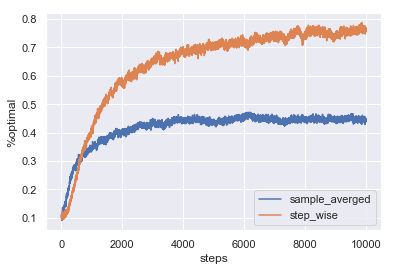

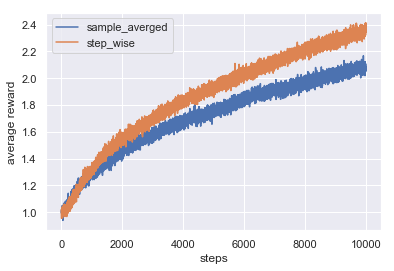

In [149]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.plot(np.linspace(1,10000,10000),av_optimal_sample_averaged_non/2000, label="sample_averged")
plt.plot(np.linspace(1,10000,10000),av_optimal_step_wise_non/2000, label="step_wise")
plt.legend()
plt.ylabel('%optimal')
plt.xlabel('steps')
plt.show()
plt.plot(np.linspace(1,10000,10000),av_reward_sample_averaged_non/2000, label="sample_averged")
plt.plot(np.linspace(1,10000,10000),av_reward_step_wise_non/2000, label="step_wise")
plt.legend()
plt.ylabel('average reward')
plt.xlabel('steps')
plt.show()

Clearly sample averages were not able to match up with the changes in rewards.